In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# GCS_OUTPUT_PATH = "gs://doc_parser12345/"
# # PROCESSOR_NAME = "https://us-documentai.googleapis.com/v1/projects/712357922075/locations/us/processors/5d98407fb8df954c:process"
# PROCESSOR_NAME = "projects/712357922075/locations/us/processors/5d98407fb8df954c"

# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = './docextraction-440803-2193a2f4556f.json'


In [3]:
from llama_index.core import Settings
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

Settings.llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
Settings.embed_model = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

c:\Code\Github\document_classifier\classifier\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
file_path = "../document-001-115484.out.000.pdf"

In [5]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# put your local directore here
documents_images_v2 = SimpleDirectoryReader("./data/").load_data()

In [6]:
# %pip install llama-index-llms-openai
# %pip install llama-index-multi-modal-llms-openai
# %pip install llama-index-vector-stores-qdrant

In [7]:
# !pip install llama-index qdrant_client pyMuPDF tools frontend git+https://github.com/openai/CLIP.git easyocr


In [8]:
documents_images_v2

[ImageDocument(id_='4e30ed22-5c59-4845-ad58-aff4d0e169d8', embedding=None, metadata={'file_path': 'c:\\Code\\Github\\document_classifier\\classifier\\data\\document-001-115484.out.000.png', 'file_name': 'document-001-115484.out.000.png', 'file_type': 'image/png', 'file_size': 116942, 'creation_date': '2024-11-05', 'last_modified_date': '2009-09-01'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='c:\\Code\\Github\\document_classifier\\classifier\\data\\document-001-115484.out.000.png', image_url=None, image_mimetype=None, text_embedding=None)]

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch
import io
from PIL import Image, ImageDraw
import numpy as np
import csv
import pandas as pd

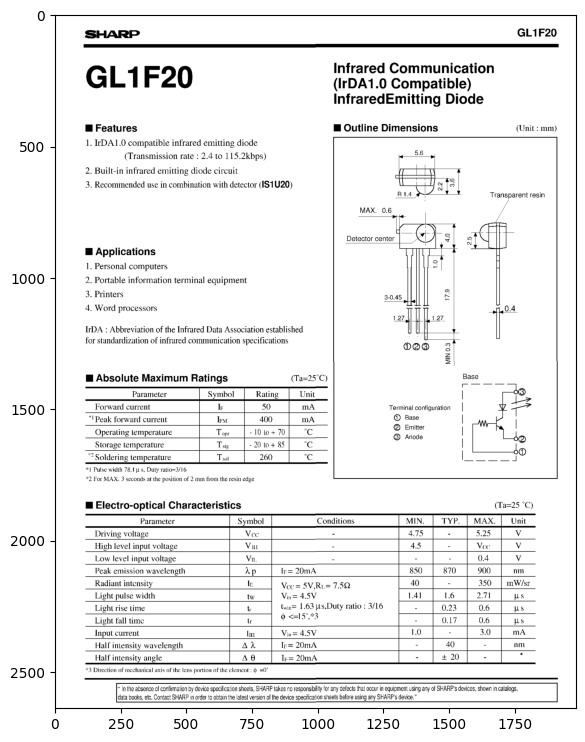

In [10]:
image = Image.open(documents_images_v2[0].image_path).convert("RGB")

plt.figure(figsize=(16, 9))
plt.imshow(image)

In [11]:
OPENAI_API_KEY=os.environ.get("OPENAI_API_KEY")


In [12]:
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=1500
)

image_prompt = """
    Please load the table data and output in the json format from the image.
    Please try your best to extract the table data from the image.
    If you can't extract the table data, please summarize image and return the summary.
"""
response = openai_mm_llm.complete(
    prompt=image_prompt,
    image_documents=[documents_images_v2[0]],
)

print(response)

The image is a datasheet for the Sharp GL1F20 Infrared Emitting Diode. Here’s a summary of the key information:

### Features
1. IrDA1.0 compatible infrared emitting diode.
2. Built-in infrared emitting diode chip.
3. Recommended for use with detector (IS1U20).

### Applications
1. Personal computers.
2. Portable information terminal equipment.
3. Various infrared communication devices.

### Absolute Maximum Ratings (Ta=25°C)
- Forward Current (IF): 50 mA
- Reverse Voltage (VR): 3 V
- Power Dissipation (P): 75 mW
- Operating Temperature (Topr): -25 to +85 °C
- Storage Temperature (Tstg): -40 to +100 °C

### Electro-optical Characteristics (Ta=25°C)
- Forward Voltage (VF): 1.2 V (typ), 1.5 V (max)
- Reverse Current (IR): 10 µA (max)
- Peak Emission Wavelength (λp): 870 nm (typ)
- Half Intensity Angle (θ): ±15°
- Rise Time (tr): 15 ns (typ)
- Fall Time (tf): 15 ns (typ)

### Outline Dimensions
- Detailed dimensions are provided in a diagram.

This summary captures the main technical spec